# Visualizaciones y Análisis de Datos

## Cargamos los datos y las librerías necesarias

In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

from src import (
    get_config,
    plot_mean_values_by_hour_for_each_month,
    plot_acf,
    plot_pacf,
    plot_stations_in_map,
)
from src.data import load_train_test

In [3]:
config = get_config()
train, test = load_train_test(config.processed_data_path)

In [4]:
train.head()

,90,102,101,107,65,103,missing,precipitation,festivos
timestamps,,,,,,,,,
2022-01-01 00:00:00,19.0,21.0,21.0,14.0,13.0,15.0,0,0.0,1
2022-01-01 01:00:00,19.0,20.0,21.0,14.0,11.0,15.0,0,0.0,1
2022-01-01 02:00:00,19.0,20.0,20.0,14.0,11.0,13.0,0,0.0,1
2022-01-01 03:00:00,18.0,20.0,20.0,14.0,11.0,12.0,0,0.0,1
2022-01-01 04:00:00,18.0,20.0,19.0,14.0,11.0,11.0,0,0.0,1


In [5]:
test.head()

,90,102,101,107,65,103,missing,precipitation,festivos
timestamps,,,,,,,,,
2022-11-15 00:00:00,5.0,7.0,3.0,4.0,6.0,10.0,0,0.0,0
2022-11-15 01:00:00,4.0,7.0,3.0,4.0,7.0,9.0,0,0.0,0
2022-11-15 02:00:00,5.0,7.0,3.0,2.0,8.0,8.0,0,0.0,0
2022-11-15 03:00:00,5.0,6.0,3.0,3.0,8.0,8.0,0,0.0,0
2022-11-15 04:00:00,5.0,6.0,3.0,3.0,8.0,8.0,0,0.1,0


In [6]:
stations = pd.read_csv(config.processed_data_path / "stations_metadata.csv", index_col=0)

In [10]:
other_stations_ids = [102, 101, 107, 65, 103]
# plot_stations_in_map(
#     stations,
#     target_station_id=config.target_station_id,
#     other_stations_ids=other_stations_ids,
# )

In [9]:
stations.loc[[config.target_station_id] + other_stations_ids]

,name,number,address,latitude,longitude,total_bases
id,,,,,,
90,Puerta de Madrid,85,Avenida de Menéndez Pelayo esquina calle O'Don...,40.421501,-3.680008,27
102,Alcalá,97,Avenida de Menéndez Pelayo nº 3,40.422297,-3.680519,27
101,Castelló,96,Calle Alcalá nº 111,40.422064,-3.682179,27
107,Velázquez,102,Calle Alcalá nº 95,40.421180,-3.684023,24
65,Narváez,61,Calle O'Donnell nº 28,40.421398,-3.675204,24
103,Plaza de Felipe II,98,Plaza de Felipe II,40.423945,-3.675838,24


## Columna Objetivo: Estación 'Puerta de Madrid'

In [ ]:
target_column = str(config.target_station_id)
train_target_series = train[target_column]
test_target_series = test[target_column]
complete_target_series = pd.concat([train_target_series, test_target_series])

### Visualizaciones generales

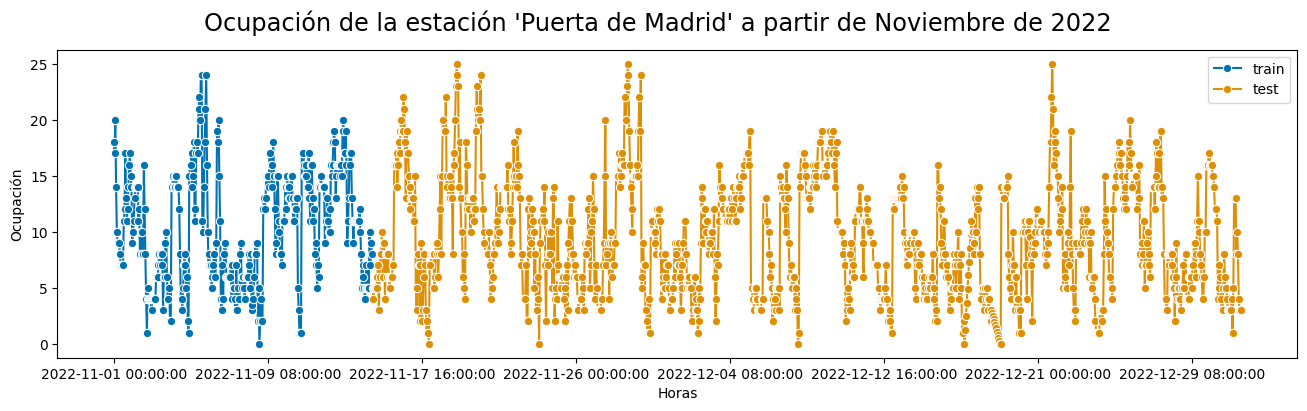

In [ ]:
plot_series(
    train_target_series["2022-11"],
    test_target_series,
    labels=["train", "test"],
    x_label="Horas",
    y_label="Ocupación",
    title="Ocupación de la estación 'Puerta de Madrid' a partir de Noviembre de 2022",
)
plt.show()

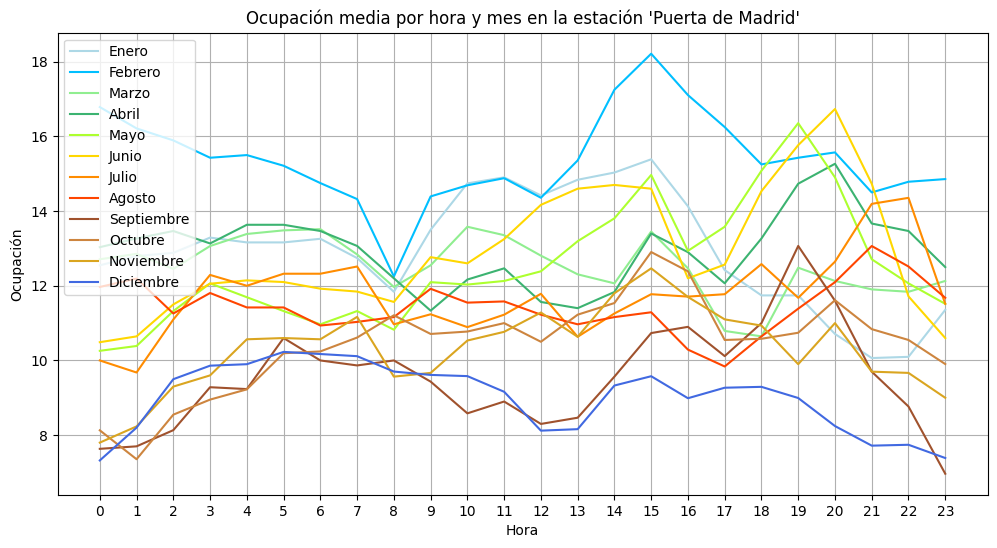

In [ ]:
plot_mean_values_by_hour_for_each_month(
    complete_target_series,
    ylabel="Ocupación",
    title="Ocupación media por hora y mes en la estación 'Puerta de Madrid'",
)

### Test de estacionariedad

In [ ]:
result = adfuller(train_target_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -11.557313622295261
p-value: 3.334722951390295e-21
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### Plots de autocorrelación

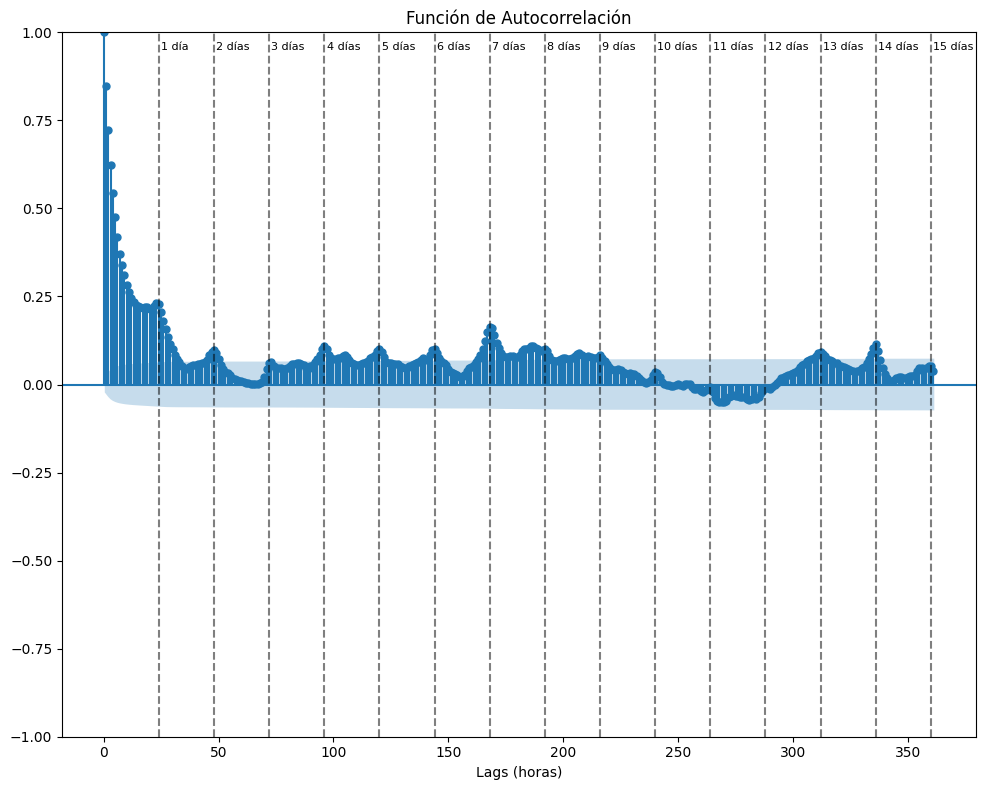

In [ ]:
plot_acf(
    train_target_series,
    lags=24 * 15 + 1,
    figsize=(10, 8),
    add_day_vertical_lines=True,
)
plt.show()

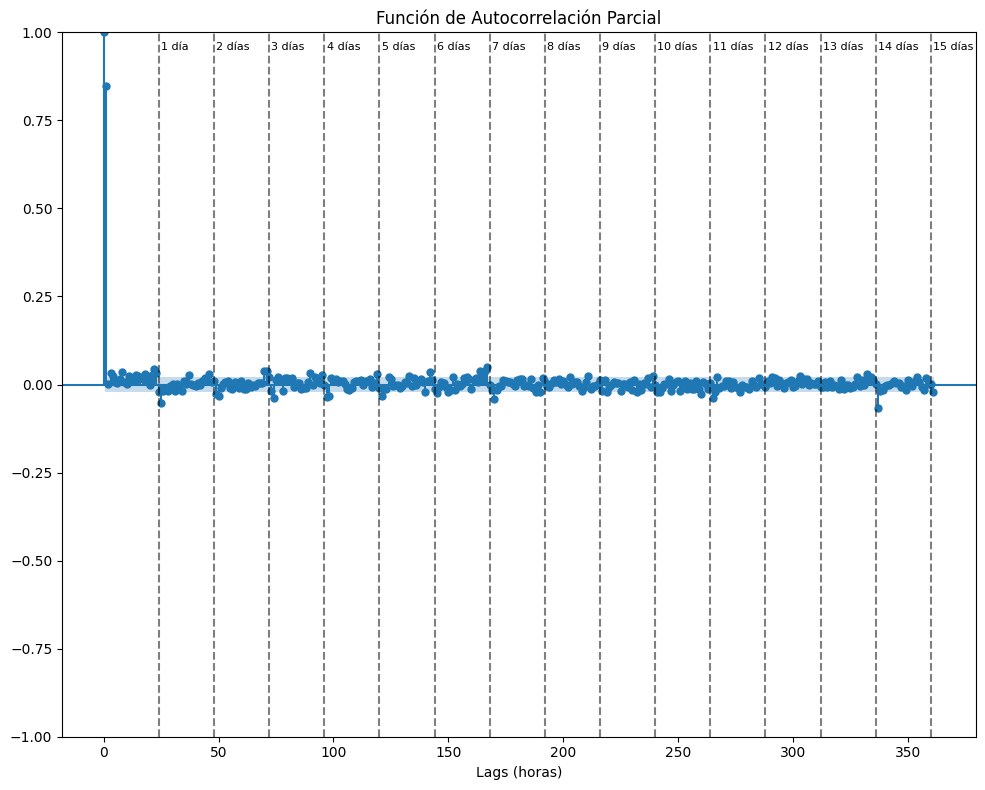

In [ ]:
plot_pacf(
    train_target_series,
    lags=24 * 15 + 1,
    figsize=(10, 8),
    add_day_vertical_lines=True,
)
plt.show()